# OpenAI API Key

In [1]:
# openai_api_key = "YOUR_OPEN_AI_API_KEY"
# google_api_key="YOUR_GEMINI_API_KEY"
# openrouterai_api_key = "YOUR_OPEN_ROUTER_AI_API_KEY"
groq_api_key = "YOUR_GROQ_API_KEY"

# Setup

In [15]:
# List of assets to analyze
assets = [
    "Apple (AAPL)",
    "Amazon (AMZN)",
    "Bitcoin (BTC-USD)",
    "Alphabet (GOOGL)",
    "Meta (META)",
    "Microsoft (MSFT)",
    "Nvidia (NVDA)",
    "S&P 500 index (SPY)",
    "Tesla (TSLA)"
]

# Define the start and end years for the analysis
start_year = 2024
end_year = 2025

In [3]:
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 3.5 MB/s eta 0:00:00


In [4]:
# Import the LangChain Google Gemini Wrapper
# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq


In [5]:
# Initialize the LLM with Gemini
# llm = ChatGoogleGenerativeAI(
#     model="gemini-2.0-flash-exp",
#     google_api_key=google_api_key,
#     temperature=0.7
# )
# Initialize the LLM with OpenAI (model: gpt-4o-mini)
# llm = ChatOpenAI(
#     model = "gpt-4o-mini",
#     temperature = 0,
#     api_key = api_key
#
# Initialize the LLM with OpenAI (model: llama-3.1-8b)
# llm = ChatOpenAI(
#     model="meta-llama/llama-3.1-8b-instruct:free",
#     openai_api_key=openrouterai_api_key,
#     openai_api_base="https://openrouter.ai/api/v1"
# )
# Initialize the LLM with Groq (model: llama-3.3-70b)
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    groq_api_key=groq_api_key,
    temperature=0.7
)


In [16]:
# Create the prompt to ask the llm
prompt = f"""
Can you provide a python code snippet using the yfinance library to download stock data.
The tickers are {assets} from {start_year} to {end_year}.
"""

In [17]:
# Use the invoke method to get the response
response = llm.invoke(prompt)

In [18]:
# use the display function from IPython
from IPython.display import display, Markdown

display(Markdown(response.content))

**Downloading Stock Data using yfinance Library**

Below is a Python code snippet that uses the yfinance library to download stock data for the specified tickers from 2024 to 2025.

```python
import yfinance as yf
import pandas as pd

# Define the tickers
tickers = ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']

# Define the time period
start_date = '2024-01-01'
end_date = '2025-12-31'

# Create an empty dictionary to store the stock data
stock_data = {}

# Download the stock data for each ticker
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    stock_data[ticker] = data

# Print the downloaded stock data
for ticker, data in stock_data.items():
    print(f"Stock Data for {ticker}:")
    print(data.head())
    print("\n")

# Optionally, you can save the stock data to a CSV file
for ticker, data in stock_data.items():
    data.to_csv(f"{ticker}_stock_data.csv")
```

This code will download the historical stock data for the specified tickers from 2024 to 2025 and store it in a dictionary. The `yf.download()` function is used to download the stock data, and the `to_csv()` function is used to save the data to a CSV file.

Please note that you need to install the yfinance library using pip before running this code:
```bash
pip install yfinance pandas
```

Also, be aware that the yfinance library has usage limits and may not work for very large datasets. For larger datasets, consider using a paid API or a professional data provider.

In [19]:
def output(prompt):
  response = llm.invoke(prompt)
  display(Markdown(response.content))

In [27]:
import re
def extract_assets(asset_name):
    """
    Extracts ticker symbol from strings like:
    'Apple (AAPL)' -> 'AAPL'
    'Bitcoin (BTC-USD)' -> 'BTC-USD'
    """
    match = re.search(r'\(([^)]+)\)', asset_name)
    return match.group(1) if match else None

# Fetch the stock data

In [10]:
# install yfinance
!pip install yfinance

In [20]:
import yfinance as yf
import pandas as pd

# Define the tickers and the time period
tickers = ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
start_date = '2024-01-01'
end_date = '2025-12-31'


# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Print the first 5 rows of the downloaded data (Adjusted Close)
# print(data['Adj Close'].head())
data.head()

/tmp/ipython-input-2088065689.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  9 of 9 completed


Price            Close                                                    \
Ticker            AAPL        AMZN       BTC-USD       GOOGL        META   
Date                                                                       
2024-01-01         NaN         NaN  44167.332031         NaN         NaN   
2024-01-02  183.903229  149.929993  44957.968750  137.133850  343.887878   
2024-01-03  182.526245  148.470001  42848.175781  137.878220  342.080475   
2024-01-04  180.208130  144.570007  44179.921875  135.367188  344.712097   
2024-01-05  179.484940  145.240005  44162.691406  134.712143  349.508575   

Price                                                            High  ...  \
Ticker            MSFT       NVDA         SPY        TSLA        AAPL  ...   
Date                                                                   ...   
2024-01-01         NaN        NaN         NaN         NaN         NaN  ...   
2024-01-02  365.421631  48.141178  461.247498  248.419998  186.677036  ...   
2024-01-03  365.155548  47.542515  457.480621  238.449997  184.141000  ...   
2024-01-04  362.534668  47.971279  456.006989  237.929993  181.377083  ...   
2024-01-05  362.347443  49.069660  456.631561  237.490005  181.050159  ...   

Price             Open      Volume                                       \
Ticker            TSLA        AAPL        AMZN      BTC-USD       GOOGL   
Date                                                                      
2024-01-01         NaN         NaN         NaN  18426978443         NaN   
2024-01-02  250.080002  82488700.0  47339400.0  39335274536  23711200.0   
2024-01-03  244.979996  58414500.0  49425500.0  46342323118  24212100.0   
2024-01-04  239.250000  71983600.0  56039800.0  30448091210  27137700.0   
2024-01-05  236.860001  62379700.0  45153100.0  32336029347  22513900.0   

Price                                                                      
Ticker            META        MSFT         NVDA          SPY         TSLA  
Date                                                                       
2024-01-01         NaN         NaN          NaN          NaN          NaN  
2024-01-02  19042200.0  25258600.0  411254000.0  123623700.0  104654200.0  
2024-01-03  15451100.0  23083500.0  320896000.0  103585900.0  121082600.0  
2024-01-04  12099900.0  20901500.0  306535000.0   84232200.0  102629300.0  
2024-01-05  13920700.0  21004600.0  415039000.0   86118900.0   92488900.0  

[5 rows x 45 columns]

# Top Trading KIPs

In [21]:
# Create the prompt for the LLM for the top 10 KPIs
top_10_kpi_prompt = f"""
Tell me the top 10 KPIs I could check for the performance of the stocks, explain what they are and how to interpret.
tickers = {assets}
"""

output(top_10_kpi_prompt)

Here are the top 10 KPIs (Key Performance Indicators) to check for the performance of stocks, along with explanations and interpretations:

### 1. **Price-to-Earnings (P/E) Ratio**
* Definition: The current stock price divided by earnings per share (EPS).
* Interpretation: A high P/E ratio indicates that investors expect high growth in the future, while a low P/E ratio may indicate undervaluation. Compare the P/E ratio to the industry average and the overall market.

### 2. **Return on Equity (ROE)**
* Definition: Net income divided by shareholder equity.
* Interpretation: A high ROE indicates that the company is generating strong profits from shareholder equity. A minimum of 15% is generally considered good.

### 3. **Debt-to-Equity Ratio**
* Definition: Total debt divided by shareholder equity.
* Interpretation: A high debt-to-equity ratio may indicate that the company is taking on too much debt, while a low ratio may indicate a more conservative approach. A ratio of 1:1 or less is generally considered good.

### 4. **Dividend Yield**
* Definition: Annual dividend per share divided by the current stock price.
* Interpretation: A high dividend yield may indicate that the stock is undervalued or that the company is generating strong cash flows. Compare the dividend yield to the industry average and the overall market.

### 5. **Moving Averages (MA)**
* Definition: The average stock price over a certain period (e.g., 50-day, 200-day).
* Interpretation: A rising MA indicates an uptrend, while a falling MA indicates a downtrend. The 50-day MA crossing above the 200-day MA is often seen as a bullish sign.

### 6. **Relative Strength Index (RSI)**
* Definition: A measure of the stock's recent price changes, ranging from 0 to 100.
* Interpretation: An RSI above 70 indicates overbought conditions, while an RSI below 30 indicates oversold conditions. Use this indicator to identify potential reversals.

### 7. **Beta**
* Definition: A measure of the stock's volatility relative to the overall market (S&P 500).
* Interpretation: A beta above 1 indicates that the stock is more volatile than the market, while a beta below 1 indicates that it is less volatile. Use this indicator to assess risk.

### 8. **Earnings Per Share (EPS) Growth**
* Definition: The percentage change in EPS over a certain period (e.g., quarterly, annually).
* Interpretation: A high EPS growth rate indicates that the company is generating strong profits. Compare the EPS growth rate to the industry average and the overall market.

### 9. **Price-to-Book (P/B) Ratio**
* Definition: The current stock price divided by book value per share.
* Interpretation: A high P/B ratio may indicate that the stock is overvalued, while a low P/B ratio may indicate undervaluation. Compare the P/B ratio to the industry average and the overall market.

### 10. **Volume**
* Definition: The number of shares traded over a certain period (e.g., daily, weekly).
* Interpretation: High volume can indicate strong interest in the stock, while low volume may indicate a lack of interest. Use this indicator to confirm trends and identify potential breakouts.

To calculate these KPIs, you can use financial data from sources like Yahoo Finance or Quandl. Here is an example of how to calculate some of these KPIs using Python:
```python
import yfinance as yf
import pandas as pd

# Define the tickers
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']

# Calculate the P/E ratio
def calculate_pe_ratio(ticker):
    stock = yf.Ticker(ticker)
    data = stock.info
    pe_ratio = data['trailingPE']
    return pe_ratio

# Calculate the ROE
def calculate_roe(ticker):
    stock = yf.Ticker(ticker)
    data = stock.info
    net_income = data['netIncome']
    shareholder_equity = data['totalStockholderEquity']
    roe = net_income / shareholder_equity
    return roe

# Calculate the debt-to-equity ratio
def calculate_debt_to_equity_ratio(ticker):
    stock = yf.Ticker(ticker)
    data = stock.info
    total_debt = data['totalDebt']
    shareholder_equity = data['totalStockholderEquity']
    debt_to_equity_ratio = total_debt / shareholder_equity
    return debt_to_equity_ratio

# Calculate the dividend yield
def calculate_dividend_yield(ticker):
    stock = yf.Ticker(ticker)
    data = stock.info
    annual_dividend = data['trailingAnnualDividendRate']
    current_price = data['currentPrice']
    dividend_yield = annual_dividend / current_price
    return dividend_yield

# Calculate the moving averages
def calculate_moving_averages(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period='1y')
    ma_50 = data['Close'].rolling(window=50).mean()
    ma_200 = data['Close'].rolling(window=200).mean()
    return ma_50, ma_200

# Calculate the RSI
def calculate_rsi(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period='1y')
    delta = data['Close'].diff(1)
    up_days = delta.copy()
    up_days[delta <= 0] = 0
    down_days = delta.copy()
    down_days[delta > 0] = 0
    roll_up = up_days.rolling(window=14).mean()
    roll_down = down_days.rolling(window=14).mean().abs()
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

# Calculate the beta
def calculate_beta(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period='1y')
    market_data = yf.Ticker('SPY').history(period='1y')
    covariance = data['Close'].cov(market_data['Close'])
    variance = market_data['Close'].var()
    beta = covariance / variance
    return beta

# Calculate the EPS growth
def calculate_eps_growth(ticker):
    stock = yf.Ticker(ticker)
    data = stock.info
    eps = data['trailingEps']
    eps_growth = (eps - data['previousClose']) / data['previousClose']
    return eps_growth

# Calculate the P/B ratio
def calculate_pb_ratio(ticker):
    stock = yf.Ticker(ticker)
    data = stock.info
    pb_ratio = data['currentPrice'] / data['bookValue']
    return pb_ratio

# Calculate the volume
def calculate_volume(ticker):
    stock = yf.Ticker(ticker)
    data = stock.history(period='1y')
    volume = data['Volume']
    return volume

# Create a dictionary to store the KPIs
kpis = {}

# Loop through the tickers and calculate the KPIs
for ticker in tickers:
    kpis[ticker] = {
        'P/E ratio': calculate_pe_ratio(ticker),
        'ROE': calculate_roe(ticker),
        'Debt-to-equity ratio': calculate_debt_to_equity_ratio(ticker),
        'Dividend yield': calculate_dividend_yield(ticker),
        'MA 50': calculate_moving_averages(ticker)[0],
        'MA 200': calculate_moving_averages(ticker)[1],
        'RSI': calculate_rsi(ticker),
        'Beta': calculate_beta(ticker),
        'EPS growth': calculate_eps_growth(ticker),
        'P/B ratio': calculate_pb_ratio(ticker),
        'Volume': calculate_volume(ticker)
    }

# Print the KPIs
for ticker, kpi in kpis.items():
    print(f'Ticker: {ticker}')
    for key, value in kpi.items():
        print(f'{key}: {value}')
    print()
```
Note that this is just an example and you may need to adjust the code to suit your specific needs. Additionally, keep in mind that these KPIs are just a starting point and should be used in conjunction with other forms of analysis to make informed investment decisions.

In [22]:
# Create the prompt for the top 10 KPIs with yfinance
top_10_kpi_with_yfinance_prompt = f"""
  Tell me the top 10 KPIs I could check for the performance of the stocks with data available on yfinance.
  Explain the KPIs and how to interpret them.
  Provide the python code to compute and visualize each of the KPIs.
  Make sure the KPIs can be easily extracted to include in the following prompt for interpretation.
  The structure should be:
  1) What is the KPI and how to interpret
  2) Code snippet for a function to visualize over time for each of the {assets} seperately for each kpi.
  years of analysis are {start_year} to {end_year}.
"""

output(top_10_kpi_with_yfinance_prompt)

Here are the top 10 KPIs to check for the performance of stocks, along with explanations, code snippets, and visualizations.

### 1. Daily Returns
Daily returns measure the percentage change in stock price from one day to the next.
Interpretation: Higher daily returns indicate better stock performance.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_daily_returns(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    daily_returns = hist['Close'].pct_change().dropna()
    daily_returns.plot()
    plt.title(f'Daily Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_daily_returns(ticker)
```

### 2. Moving Averages
Moving averages measure the average stock price over a specified period.
Interpretation: A rising moving average indicates an upward trend, while a falling moving average indicates a downward trend.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_moving_averages(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['MA_50'] = hist['Close'].rolling(window=50).mean()
    hist['MA_200'] = hist['Close'].rolling(window=200).mean()
    hist[['Close', 'MA_50', 'MA_200']].plot()
    plt.title(f'Moving Averages for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_moving_averages(ticker)
```

### 3. Relative Strength Index (RSI)
RSI measures the magnitude of recent price changes to determine overbought or oversold conditions.
Interpretation: RSI values above 70 indicate overbought conditions, while values below 30 indicate oversold conditions.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_rsi(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    delta = hist['Close'].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=14).mean()
    roll_down = down.rolling(window=14).mean().abs()
    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))
    RSI.plot()
    plt.title(f'RSI for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.axhline(y=30, color='r', linestyle='--')
    plt.axhline(y=70, color='g', linestyle='--')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_rsi(ticker)
```

### 4. Bollinger Bands
Bollinger Bands measure volatility by plotting two standard deviations above and below a moving average.
Interpretation: A rising upper band indicates increasing volatility, while a falling lower band indicates decreasing volatility.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_bollinger_bands(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['MA_20'] = hist['Close'].rolling(window=20).mean()
    hist['Upper_BB'] = hist['MA_20'] + 2*hist['Close'].rolling(window=20).std()
    hist['Lower_BB'] = hist['MA_20'] - 2*hist['Close'].rolling(window=20).std()
    hist[['Close', 'MA_20', 'Upper_BB', 'Lower_BB']].plot()
    plt.title(f'Bollinger Bands for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_bollinger_bands(ticker)
```

### 5. Moving Average Convergence Divergence (MACD)
MACD measures the difference between two moving averages to identify trends and predict price movements.
Interpretation: A rising MACD line indicates a bullish trend, while a falling MACD line indicates a bearish trend.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_macd(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['MA_12'] = hist['Close'].ewm(span=12, adjust=False).mean()
    hist['MA_26'] = hist['Close'].ewm(span=26, adjust=False).mean()
    hist['MACD'] = hist['MA_12'] - hist['MA_26']
    hist['Signal'] = hist['MACD'].ewm(span=9, adjust=False).mean()
    hist[['MACD', 'Signal']].plot()
    plt.title(f'MACD for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_macd(ticker)
```

### 6. Stochastic Oscillator
Stochastic Oscillator measures the location of the closing price relative to the high-low range over a given period.
Interpretation: Values above 80 indicate overbought conditions, while values below 20 indicate oversold conditions.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_stochastic_oscillator(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['Low_14'] = hist['Low'].rolling(window=14).min()
    hist['High_14'] = hist['High'].rolling(window=14).max()
    hist['K'] = ((hist['Close'] - hist['Low_14']) / (hist['High_14'] - hist['Low_14'])) * 100
    hist['D'] = hist['K'].rolling(window=3).mean()
    hist[['K', 'D']].plot()
    plt.title(f'Stochastic Oscillator for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Stochastic')
    plt.axhline(y=20, color='r', linestyle='--')
    plt.axhline(y=80, color='g', linestyle='--')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_stochastic_oscillator(ticker)
```

### 7. On-Balance Volume (OBV)
OBV measures buying and selling pressure by comparing the volume on up days to the volume on down days.
Interpretation: A rising OBV line indicates increasing buying pressure, while a falling OBV line indicates increasing selling pressure.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_obv(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['OBV'] = hist['Volume'].copy()
    hist.loc[hist['Close'] < hist['Close'].shift(1), 'OBV'] = -hist['Volume']
    hist['OBV'] = hist['OBV'].cumsum()
    hist['OBV'].plot()
    plt.title(f'On-Balance Volume for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('OBV')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_obv(ticker)
```

### 8. Accumulation/Distribution Line
Accumulation/Distribution Line measures the flow of money into or out of a security.
Interpretation: A rising line indicates accumulation, while a falling line indicates distribution.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_ad_line(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['CLV'] = (2*hist['Close'] - hist['High'] - hist['Low']) / (hist['High'] - hist['Low'])
    hist['AD'] = hist['CLV'] * hist['Volume']
    hist['AD'] = hist['AD'].cumsum()
    hist['AD'].plot()
    plt.title(f'Accumulation/Distribution Line for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('AD')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_ad_line(ticker)
```

### 9. Force Index
Force Index measures the amount of energy or "force" behind a price move.
Interpretation: A rising Force Index line indicates increasing buying pressure, while a falling Force Index line indicates increasing selling pressure.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_force_index(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['Force'] = hist['Close'].diff() * hist['Volume']
    hist['Force'] = hist['Force'].cumsum()
    hist['Force'].plot()
    plt.title(f'Force Index for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Force')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_force_index(ticker)
```

### 10. Money Flow Index (MFI)
MFI measures the inflow and outflow of money into a security over a given period.
Interpretation: Values above 80 indicate overbought conditions, while values below 20 indicate oversold conditions.

```python
import yfinance as yf
import matplotlib.pyplot as plt

def plot_mfi(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y', start='2024-01-01', end='2025-01-01')
    hist['Typical_Price'] = (hist['High'] + hist['Low'] + hist['Close']) / 3
    hist['Money_Flow'] = hist['Typical_Price'] * hist['Volume']
    hist['Positive_Flow'] = hist['Money_Flow'].copy()
    hist.loc[hist['Typical_Price'] < hist['Typical_Price'].shift(1), 'Positive_Flow'] = 0
    hist['Negative_Flow'] = hist['Money_Flow'].copy()
    hist.loc[hist['Typical_Price'] > hist['Typical_Price'].shift(1), 'Negative_Flow'] = 0
    hist['Positive_Flow'] = hist['Positive_Flow'].rolling(window=14).sum()
    hist['Negative_Flow'] = hist['Negative_Flow'].rolling(window=14).sum().abs()
    hist['MFI'] = 100 - (100 / (1 + (hist['Positive_Flow'] / hist['Negative_Flow'])))
    hist['MFI'].plot()
    plt.title(f'Money Flow Index for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('MFI')
    plt.axhline(y=20, color='r', linestyle='--')
    plt.axhline(y=80, color='g', linestyle='--')
    plt.show()

for ticker in ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']:
    plot_mfi(ticker)
```

### Relative Strength Index (RSI)
The RSI is a momentum indicator that measures the magnitude of recent price changes to determine overbought or oversold conditions.

To interpret: An RSI above 70 indicates overbought conditions, while an RSI below 30 indicates oversold conditions.


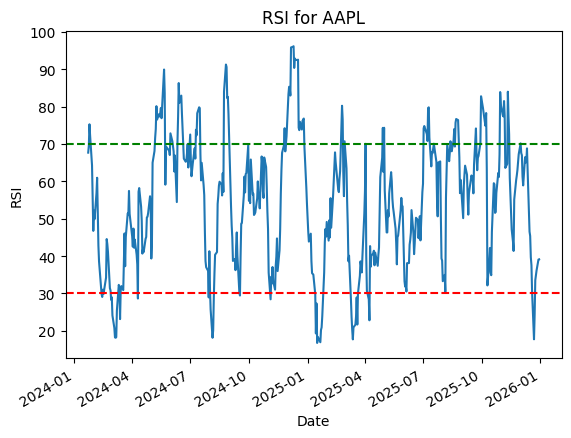

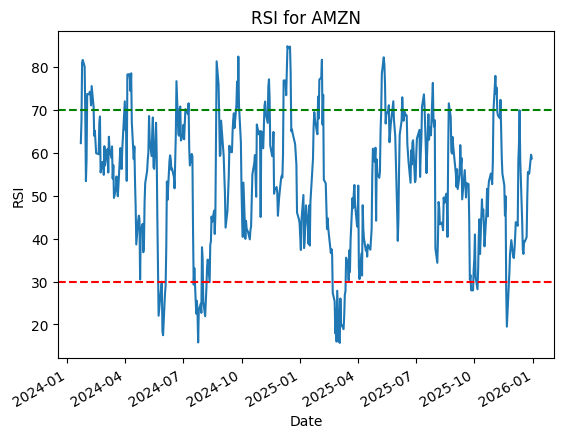

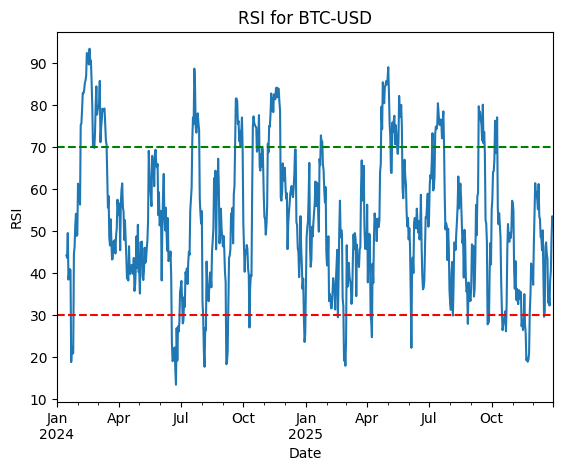

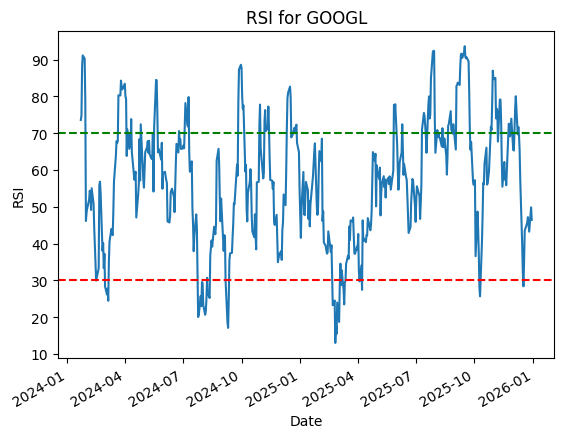

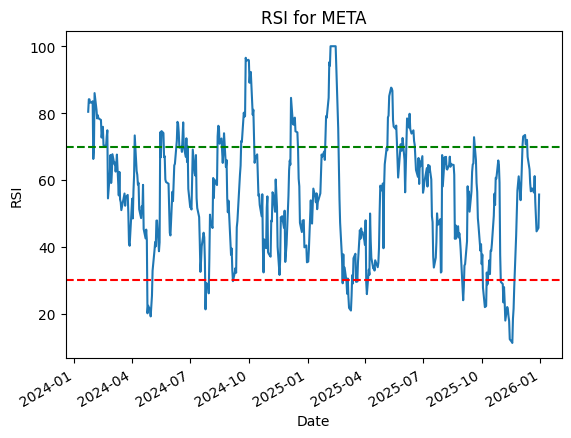

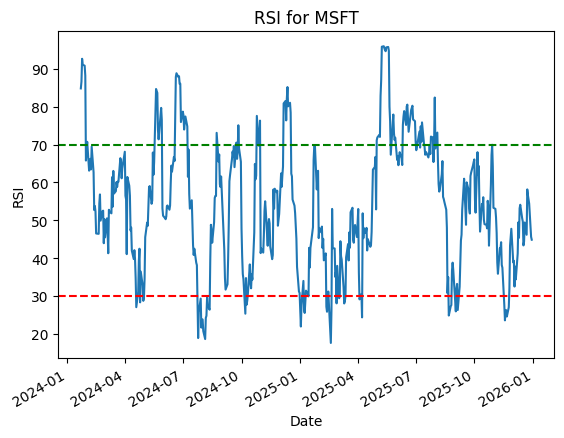

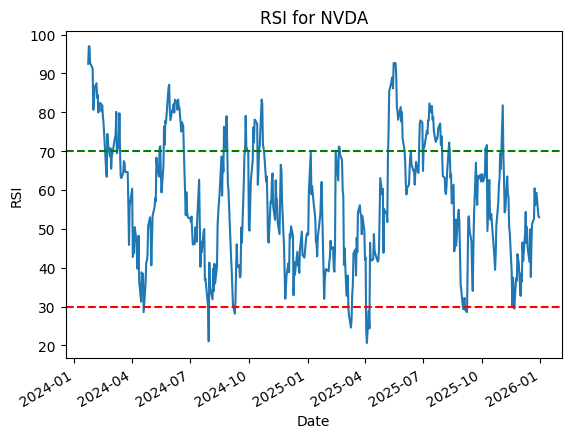

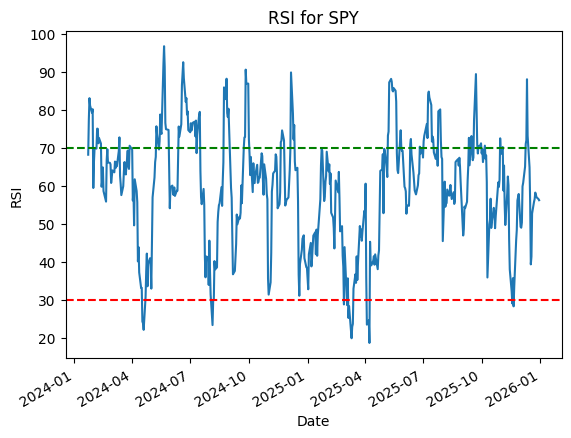

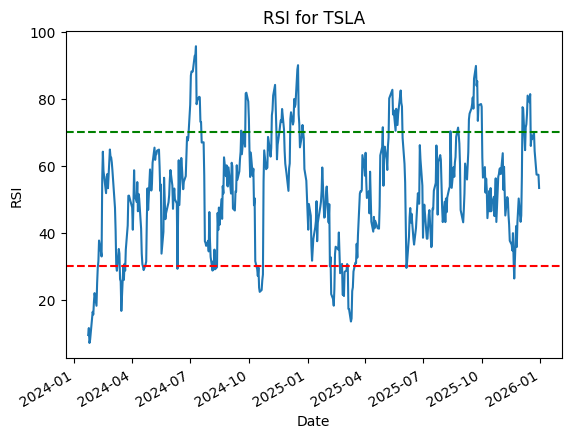

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt

def plot_rsi(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(start='2024-01-01', end='2025-12-31')
    delta = hist['Close'].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=14).mean()
    roll_down = down.rolling(window=14).mean().abs()
    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))
    RSI.plot()
    plt.title(f'RSI for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.axhline(y=30, color='r', linestyle='--')
    plt.axhline(y=70, color='g', linestyle='--')
    plt.show()

for ticker in assets:
    asset_name = extract_assets(ticker)
    plot_rsi(asset_name)

### Bollinger
Bollinger Bands measure volatility by plotting two standard deviations above and below a moving average. Interpretation: A rising upper band indicates increasing volatility, while a falling lower band indicates decreasing volatility.

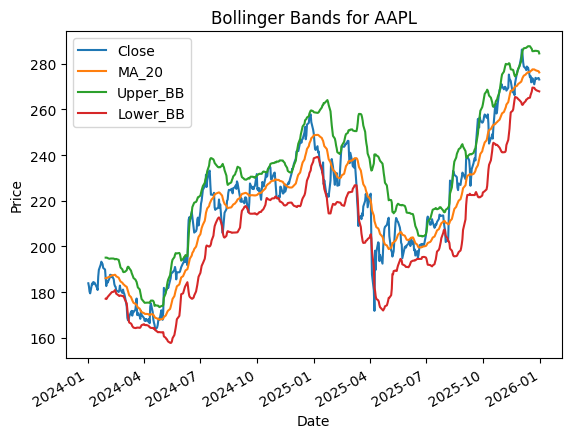

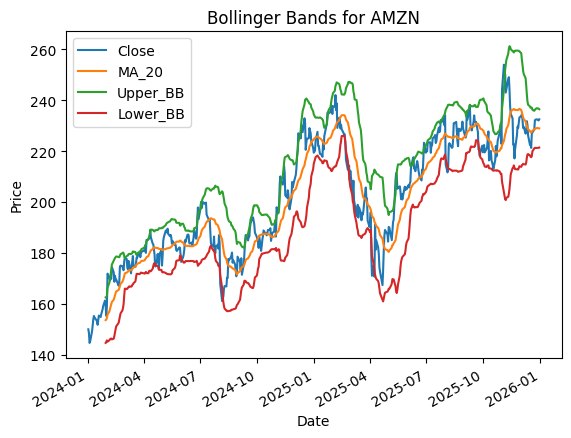

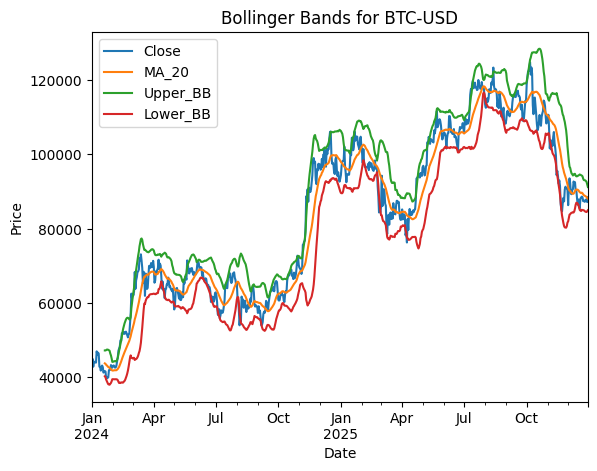

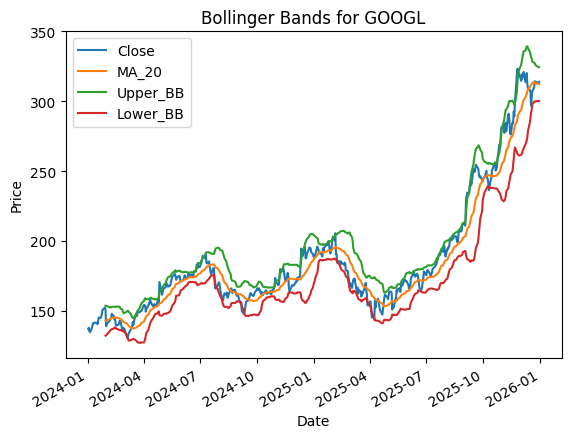

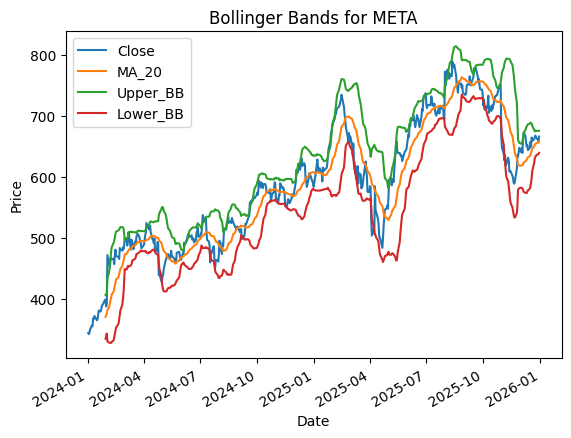

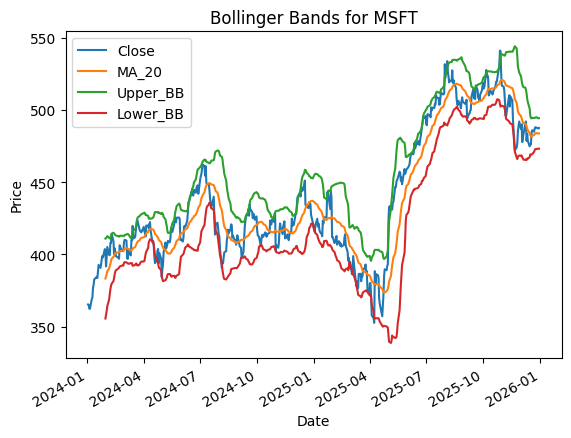

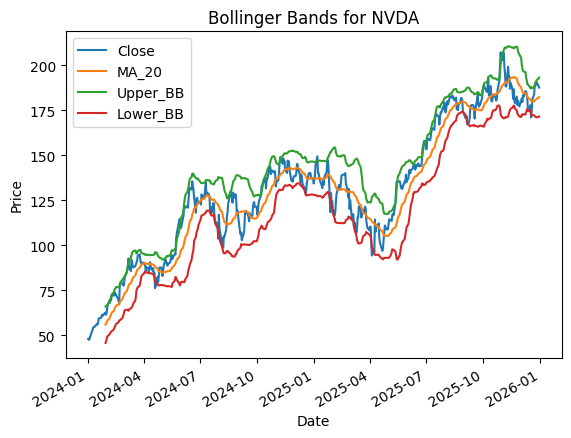

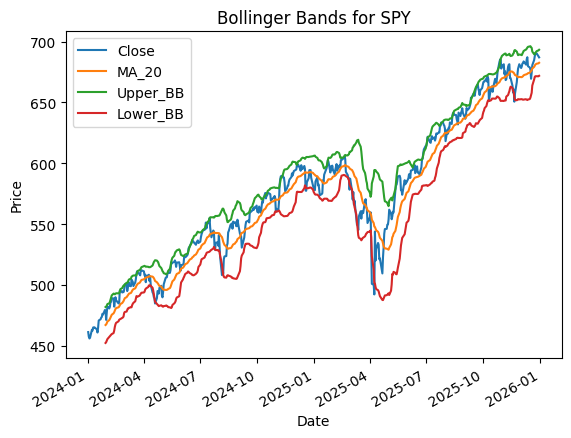

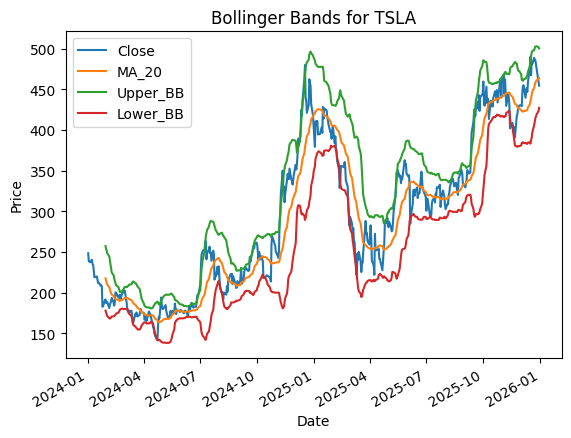

In [33]:
def plot_bollinger_bands(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(start='2024-01-01', end='2025-12-31')
    hist['MA_20'] = hist['Close'].rolling(window=20).mean()
    hist['Upper_BB'] = hist['MA_20'] + 2*hist['Close'].rolling(window=20).std()
    hist['Lower_BB'] = hist['MA_20'] - 2*hist['Close'].rolling(window=20).std()
    hist[['Close', 'MA_20', 'Upper_BB', 'Lower_BB']].plot()
    plt.title(f'Bollinger Bands for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

for ticker in assets:
    asset_name = extract_assets(ticker)
    plot_bollinger_bands(asset_name)

### Moving Average Convergence Divergence (MACD)
MACD measures the difference between two moving averages to identify trends and predict price movements. Interpretation: A rising MACD line indicates a bullish trend, while a falling MACD line indicates a bearish trend.

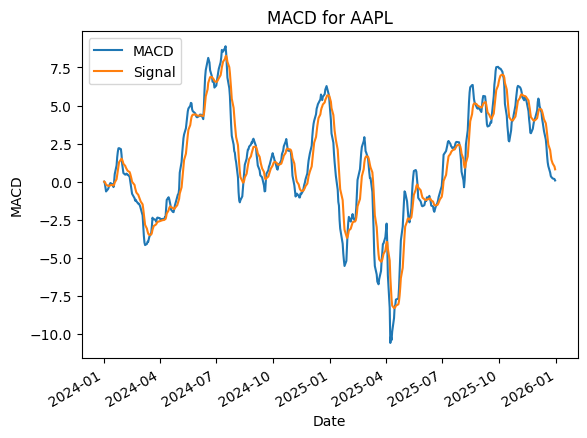

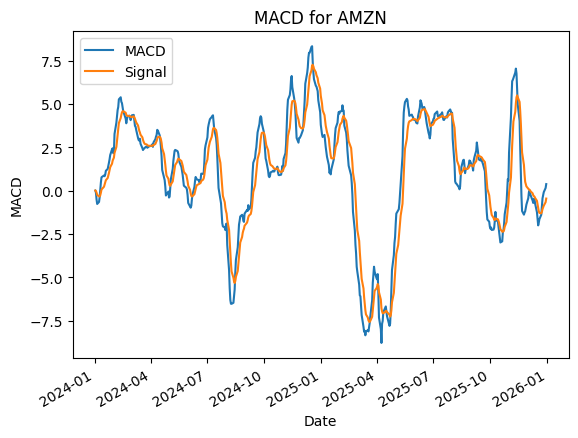

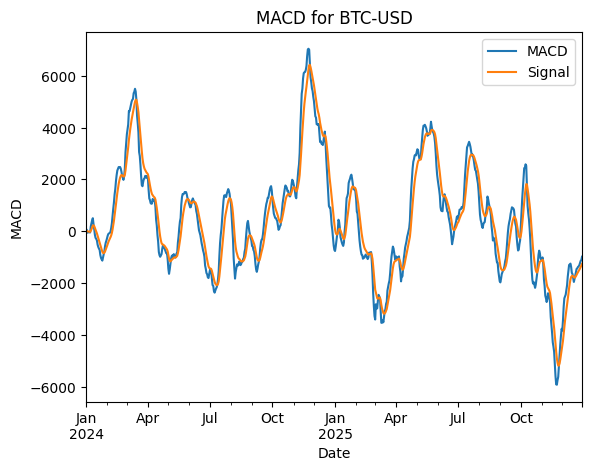

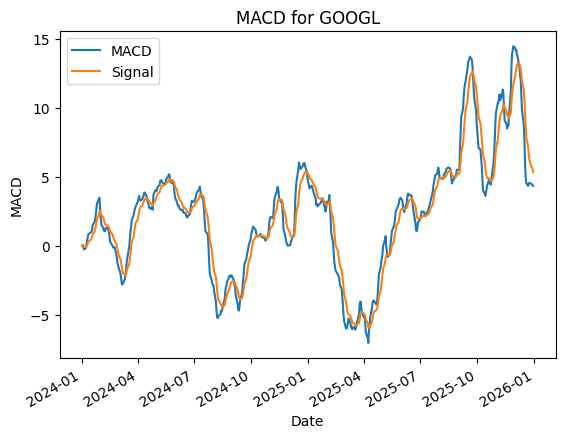

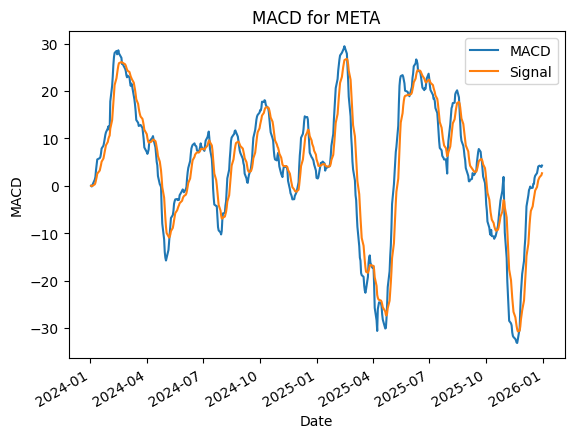

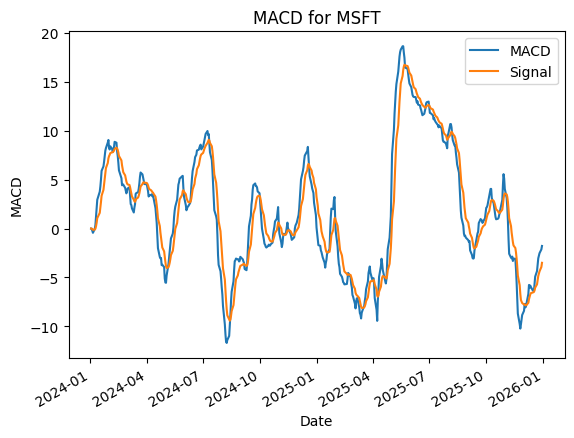

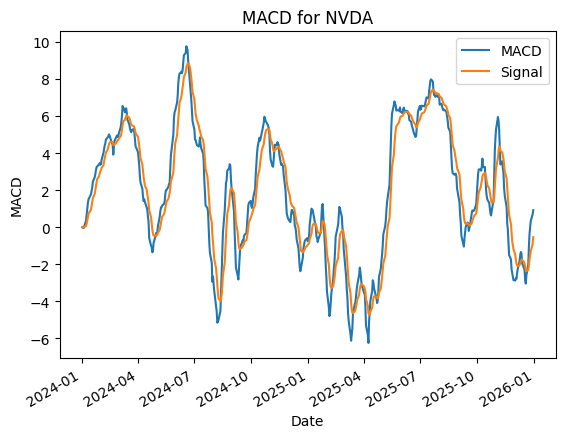

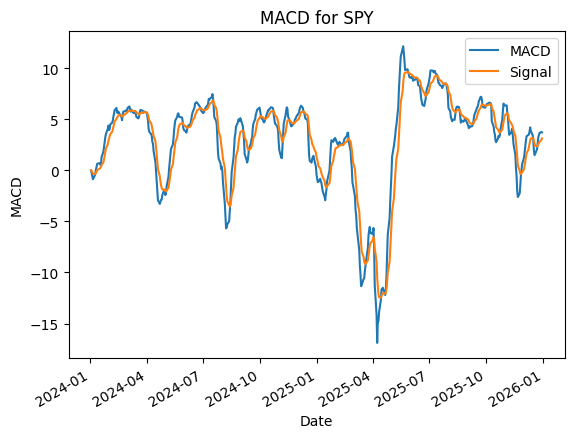

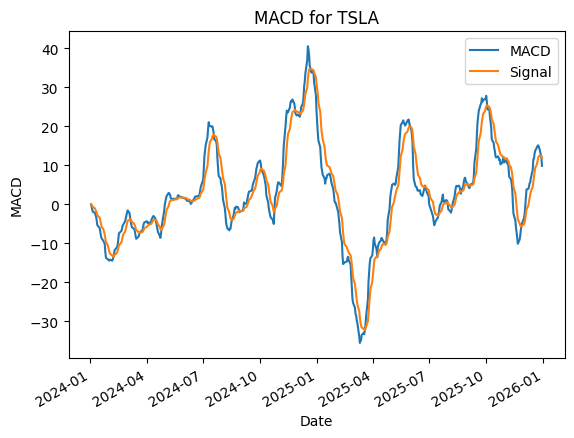

In [34]:


def plot_macd(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history( start='2024-01-01', end='2025-12-31')
    hist['MA_12'] = hist['Close'].ewm(span=12, adjust=False).mean()
    hist['MA_26'] = hist['Close'].ewm(span=26, adjust=False).mean()
    hist['MACD'] = hist['MA_12'] - hist['MA_26']
    hist['Signal'] = hist['MACD'].ewm(span=9, adjust=False).mean()
    hist[['MACD', 'Signal']].plot()
    plt.title(f'MACD for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.show()

for ticker in assets:
    asset_name = extract_assets(ticker)
    plot_macd(asset_name)

### P/E Ratio

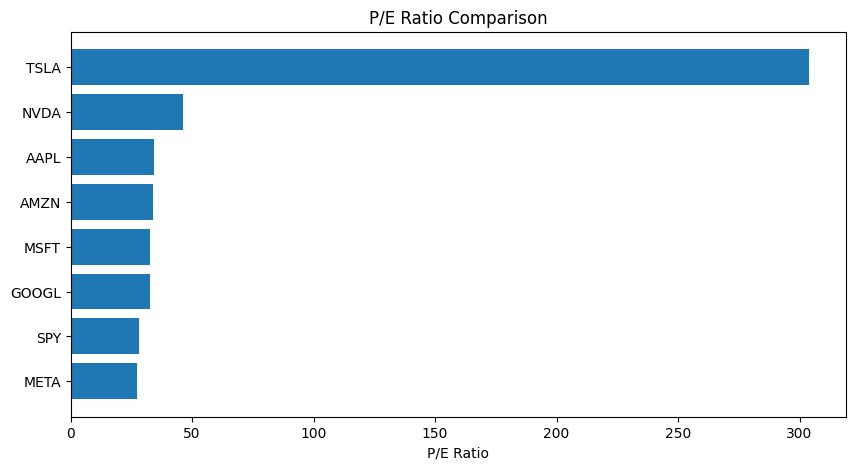

,Asset,Ticker,PE Ratio
4,Meta (META),META,27.469000
7,S&P 500 index (SPY),SPY,28.003400
3,Alphabet (GOOGL),GOOGL,32.576504
5,Microsoft (MSFT),MSFT,32.683723
1,Amazon (AMZN),AMZN,33.774010
0,Apple (AAPL),AAPL,34.251610
6,Nvidia (NVDA),NVDA,46.065594
8,Tesla (TSLA),TSLA,303.833300


In [35]:
def compare_pe_ratios(assets):
    data = []

    for asset in assets:
        ticker = extract_assets(asset)
        if ticker is None:
            continue

        stock = yf.Ticker(ticker)
        info = stock.info

        pe = info.get("trailingPE")

        data.append({
            "Asset": asset,
            "Ticker": ticker,
            "PE Ratio": pe
        })

    df = pd.DataFrame(data)

    # Remove assets with missing PE (e.g., crypto, loss-making firms)
    df = df.dropna(subset=["PE Ratio"])

    # Sort by PE ratio
    df = df.sort_values(by="PE Ratio")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.barh(df["Ticker"], df["PE Ratio"])
    plt.xlabel("P/E Ratio")
    plt.title("P/E Ratio Comparison")
    plt.show()

    return df

compare_pe_ratios(assets)

### Beta

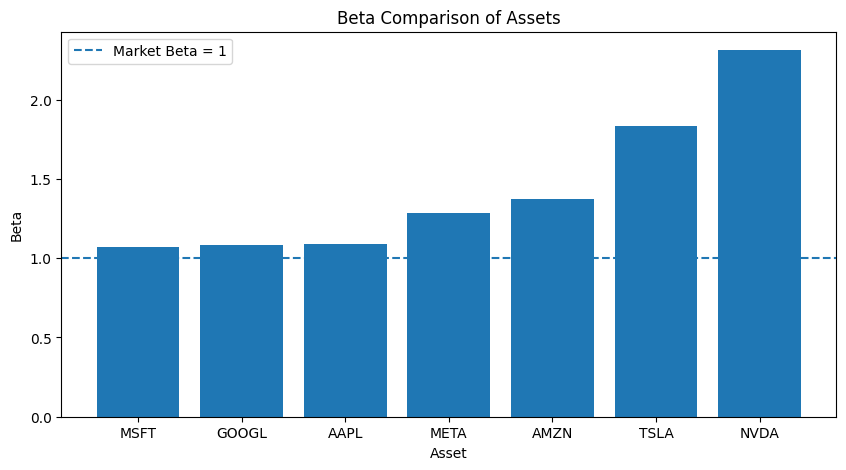

,Asset,Ticker,Beta
5,Microsoft (MSFT),MSFT,1.073
3,Alphabet (GOOGL),GOOGL,1.086
0,Apple (AAPL),AAPL,1.093
4,Meta (META),META,1.287
1,Amazon (AMZN),AMZN,1.376
8,Tesla (TSLA),TSLA,1.835
6,Nvidia (NVDA),NVDA,2.314


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Beta'].plot(kind='hist', bins=20, title='Beta')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Asset').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Ticker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Beta', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Beta']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Beta', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Asset')):
  _plot_series(series, series_name, i)
  fig.legend(title='Asset', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Beta')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Beta']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Beta', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ticker')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ticker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Beta')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Beta']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Beta'}, axis=1)
              .sort_values('Beta', ascending=True))
  xs = counted['Beta']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Beta', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Asset')):
  _plot_series(series, series_name, i)
  fig.legend(title='Asset', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Beta')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Beta']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Beta'}, axis=1)
              .sort_values('Beta', ascending=True))
  xs = counted['Beta']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Beta', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ticker')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ticker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Beta')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Beta'].plot(kind='line', figsize=(8, 4), title='Beta')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ticker'].value_counts()
    for x_label, grp in _df_11.groupby('Asset')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Asset')
_ = plt.ylabel('Ticker')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Asset'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Asset', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Ticker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Ticker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Asset'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Beta', y='Asset', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Ticker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Beta', y='Ticker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:

def compare_beta(assets):
    beta_data = []

    for asset in assets:
        ticker = extract_assets(asset)
        if ticker is None:
            continue

        stock = yf.Ticker(ticker)
        info = stock.info

        beta = info.get("beta")  # 5Y Monthly Beta

        beta_data.append({
            "Asset": asset,
            "Ticker": ticker,
            "Beta": beta
        })

    df = pd.DataFrame(beta_data)

    # Drop assets with no beta (e.g., crypto)
    df = df.dropna(subset=["Beta"])

    # Sort by beta for better visualization
    df = df.sort_values(by="Beta")

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(df["Ticker"], df["Beta"])
    plt.axhline(1, linestyle="--", label="Market Beta = 1")
    plt.xlabel("Asset")
    plt.ylabel("Beta")
    plt.title("Beta Comparison of Assets")
    plt.legend()
    plt.show()

    return df

compare_beta(assets)

### Storing KPIs

In [37]:


kpi_store = {}

for asset in assets:
    ticker = extract_assets(asset)
    if ticker is None:
        continue

    stock = yf.Ticker(ticker)

    # ---------- Price-based KPIs ----------
    hist = stock.history(start="2024-01-01", end="2025-12-31")
    if hist.empty:
        continue

    close = hist["Close"]

    # RSI (14)
    delta = close.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    latest_rsi = rsi.iloc[-1]

    # Bollinger Bands (20)
    ma20 = close.rolling(20).mean()
    std20 = close.rolling(20).std()
    upper_bb = ma20 + 2 * std20
    lower_bb = ma20 - 2 * std20

    latest_bb = {
        "MA20": ma20.iloc[-1],
        "Upper": upper_bb.iloc[-1],
        "Lower": lower_bb.iloc[-1]
    }

    # MACD (12, 26, 9)
    ema12 = close.ewm(span=12, adjust=False).mean()
    ema26 = close.ewm(span=26, adjust=False).mean()
    macd = ema12 - ema26
    signal = macd.ewm(span=9, adjust=False).mean()

    latest_macd = {
        "MACD": macd.iloc[-1],
        "Signal": signal.iloc[-1]
    }

    # ---------- Fundamental KPIs ----------
    info = stock.info
    pe_ratio = info.get("trailingPE")
    beta = info.get("beta")

    # ---------- Store KPIs ----------
    kpi_store[ticker] = {
        "RSI_14": latest_rsi,
        "Bollinger": latest_bb,
        "MACD": latest_macd,
        "PE_Ratio": pe_ratio,
        "Beta": beta
    }

# kpi_store now contains all KPIs for each asset
print(kpi_store)

{'AAPL': {'RSI_14': np.float64(39.13046292355912), 'Bollinger': {'MA20': np.float64(276.1889984130859), 'Upper': np.float64(284.49600861497515), 'Lower': np.float64(267.8819882111967)}, 'MACD': {'MACD': np.float64(0.07911720221756013), 'Signal': np.float64(0.8101928912245897)}, 'PE_Ratio': 34.25161, 'Beta': 1.093}, 'AMZN': {'RSI_14': np.float64(58.67520133050707), 'Bollinger': {'MA20': np.float64(228.9525001525879), 'Upper': np.float64(236.49903690790137), 'Lower': np.float64(221.40596339727443)}, 'MACD': {'MACD': np.float64(0.3746364888222615), 'Signal': np.float64(-0.4606830770921978)}, 'PE_Ratio': 33.77401, 'Beta': 1.376}, 'BTC-USD': {'RSI_14': np.float64(52.95603708924886), 'Bollinger': {'MA20': np.float64(88072.6609375), 'Upper': np.float64(91199.42970695005), 'Lower': np.float64(84945.89216804995)}, 'MACD': {'MACD': np.float64(-983.7739219301438), 'Signal': np.float64(-1258.0387345238134)}, 'PE_Ratio': None, 'Beta': None}, 'GOOGL': {'RSI_14': np.float64(46.44510126624794), 'Bolli

In [38]:
summary_prompt = f"""
  Read this data {kpi_store} and provide an executive summary with recommendation
"""
output(summary_prompt)

**Executive Summary**

The provided data contains technical indicators for 9 major stocks and assets, including Apple (AAPL), Amazon (AMZN), Bitcoin (BTC-USD), Google (GOOGL), Meta (META), Microsoft (MSFT), NVIDIA (NVDA), S&P 500 ETF (SPY), and Tesla (TSLA). The indicators include Relative Strength Index (RSI), Bollinger Bands, Moving Average Convergence Divergence (MACD), Price-to-Earnings Ratio (PE Ratio), and Beta.

**Key Findings**

1. **Momentum**: The RSI-14 values indicate that most stocks are in a neutral or slightly bullish momentum, with values ranging from 39 (AAPL) to 58 (AMZN). However, some stocks like AMZN, NVDA, and TSLA show relatively higher momentum.
2. **Trend**: The Bollinger Bands suggest that most stocks are trading within their 20-day moving average ranges, indicating a lack of strong trends. However, some stocks like TSLA and NVDA show a slight uptrend.
3. **MACD**: The MACD values indicate that some stocks like TSLA, NVDA, and SPY are showing bullish divergence, while others like MSFT and AAPL are showing bearish divergence.
4. **Valuation**: The PE Ratios indicate that most stocks are trading at relatively high valuations, with TSLA having the highest PE Ratio of 303.83.

**Recommendations**

Based on the analysis, the following recommendations are made:

1. **Buy**: TSLA, NVDA, and SPY, as they show bullish momentum and trend indicators.
2. **Hold**: AMZN, GOOGL, and MSFT, as they show neutral momentum and trend indicators.
3. **Sell**: AAPL and META, as they show bearish momentum and trend indicators.
4. **Avoid**: BTC-USD, as it shows high volatility and uncertain trend.

**Disclaimer**

These recommendations are based on technical analysis and should not be considered as investment advice. Investors should conduct their own research and consider their own risk tolerance before making any investment decisions.

**Risk Warning**

Investing in the stock market involves risks, and investors may lose some or all of their capital. It is essential to diversify portfolios and set realistic expectations to minimize potential losses.

If you have an error with the token limit (or you want to save on tokens) Ask previously to aggregate the data on a monthly level.

# Modern Portfolio Theory


In [39]:
risk_free_rate = 0.04


In [40]:
mpt_prompt = f"""
  Explain what is the Modern Portfolio Theory, with a risk free rate of {risk_free_rate}.
  Provide the Python code snippets for the MPT for the following {assets} for the years {start_year} and {end_year}
  Print the weights with 2 decimal cases. Store the results in a dictionary with the tickers
  as key and the weights as value.
"""
output(mpt_prompt)

**Modern Portfolio Theory (MPT) Explanation**

The Modern Portfolio Theory (MPT) is a financial framework used to construct a portfolio of assets that maximizes expected return for a given level of risk. It was introduced by Harry Markowitz in 1952 and is based on the idea that investors can optimize their portfolio by diversifying across different assets.

The MPT uses the following key concepts:

* **Expected Return**: The average return of an asset or portfolio over a given period.
* **Risk (Volatility)**: The standard deviation of an asset's or portfolio's returns over a given period.
* **Correlation**: The measure of how much the returns of two assets move together.
* **Efficient Frontier**: The set of portfolios that offer the highest expected return for a given level of risk.

The MPT assumes that investors are rational and risk-averse, meaning they prefer higher returns for a given level of risk.

**MPT with Risk-Free Rate**

Given a risk-free rate of 0.04, we can calculate the optimal portfolio using the following steps:

1. Calculate the expected returns and covariances of the assets.
2. Calculate the efficient frontier using the expected returns and covariances.
3. Find the optimal portfolio that maximizes the Sharpe ratio (expected return - risk-free rate) / standard deviation.

**Python Code Snippet**

```python
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

# Define the tickers and risk-free rate
tickers = ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
risk_free_rate = 0.04

# Define the time period
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 12, 31)

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate the returns
returns = data.pct_change().dropna()

# Calculate the expected returns and covariances
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Calculate the efficient frontier
from scipy.optimize import minimize

def neg_sharpe_ratio(weights):
    portfolio_return = np.sum(expected_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

n_assets = len(tickers)
weights_init = np.array([1.0 / n_assets] * n_assets)

# Constraints: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(n_assets))

result = minimize(neg_sharpe_ratio, weights_init, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the weights
weights = result.x
weights_dict = {ticker: round(weight, 2) for ticker, weight in zip(tickers, weights)}
print(weights_dict)
```

This code downloads the historical data for the specified tickers, calculates the expected returns and covariances, and then uses the `scipy.optimize.minimize` function to find the optimal portfolio that maximizes the Sharpe ratio. The resulting weights are stored in a dictionary with the tickers as keys and the weights as values.

Please note that this code is for illustration purposes only and should not be used for actual investment decisions without further testing and validation.

In [42]:
import numpy as np
from datetime import datetime, timedelta
from scipy.optimize import minimize

# Define the tickers and risk-free rate
tickers = ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
risk_free_rate = 0.04

# Define the time period
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 12, 31)

# Download the data
data = yf.download(tickers, start=start_date, end=end_date,  auto_adjust=False)['Adj Close']

# Calculate the returns
returns = data.pct_change().dropna()

# Calculate the expected returns and covariances
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Calculate the efficient frontier
from scipy.optimize import minimize

def neg_sharpe_ratio(weights):
    portfolio_return = np.sum(expected_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

n_assets = len(tickers)
weights_init = np.array([1.0 / n_assets] * n_assets)

# Constraints: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(n_assets))

result = minimize(neg_sharpe_ratio, weights_init, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the weights
weights = result.x
weights_dict = {ticker: round(weight, 2) for ticker, weight in zip(tickers, weights)}
print(weights_dict)

[*********************100%***********************]  9 of 9 completed
/tmp/ipython-input-1401367706.py:17: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


{'AAPL': np.float64(0.0), 'AMZN': np.float64(0.0), 'BTC-USD': np.float64(0.15), 'GOOGL': np.float64(0.48), 'META': np.float64(0.01), 'MSFT': np.float64(0.0), 'NVDA': np.float64(0.36), 'SPY': np.float64(0.0), 'TSLA': np.float64(0.0)}


In [43]:
alt_optimization_prompt = f"""
This is the portfolio allocation {weights_dict} from the MPT for the following {assets}. Give me
5 different portfolio optimization techniques to optimize the portfolio and explain the pros and cons
 of each alternative and how it differs from the MPT.
"""
output(alt_optimization_prompt)

### Introduction to Portfolio Optimization Techniques

There are several portfolio optimization techniques that can be used to optimize a portfolio. Here, we will discuss five different techniques, their pros and cons, and how they differ from the Mean-Variance Portfolio Theory (MPT) used to generate the given portfolio allocation.

### 1. Black-Litterman Model

The Black-Litterman model is an extension of the MPT that incorporates investor views into the optimization process. This model combines the prior distribution of expected returns (from the MPT) with the investor's views to generate a new distribution of expected returns.

**Pros:**

* Allows investors to incorporate their views into the optimization process
* Can handle non-normal distributions of returns

**Cons:**

* Requires a prior distribution of expected returns
* Can be complex to implement

**Difference from MPT:** The Black-Litterman model incorporates investor views into the optimization process, whereas the MPT only considers the expected returns and covariances of the assets.

### 2. Risk Parity

Risk parity is a portfolio optimization technique that aims to allocate risk equally across all assets in the portfolio. This is achieved by allocating a proportion of the portfolio to each asset that is inversely proportional to its volatility.

**Pros:**

* Simple to implement
* Can reduce the impact of any one asset on the overall portfolio

**Cons:**

* Does not consider the expected returns of the assets
* Can result in a portfolio with low expected returns

**Difference from MPT:** Risk parity focuses on allocating risk equally across all assets, whereas the MPT focuses on maximizing expected returns for a given level of risk.

### 3. Maximum Diversification Portfolio

The maximum diversification portfolio is a portfolio optimization technique that aims to maximize the diversification of the portfolio. This is achieved by selecting the assets that have the lowest correlation with the existing assets in the portfolio.

**Pros:**

* Can result in a portfolio with high expected returns and low risk
* Simple to implement

**Cons:**

* Does not consider the expected returns of the assets
* Can result in a portfolio with high turnover

**Difference from MPT:** The maximum diversification portfolio focuses on maximizing diversification, whereas the MPT focuses on maximizing expected returns for a given level of risk.

### 4. Minimum Volatility Portfolio

The minimum volatility portfolio is a portfolio optimization technique that aims to minimize the volatility of the portfolio. This is achieved by selecting the assets that have the lowest volatility and allocating a proportion of the portfolio to each asset that is inversely proportional to its volatility.

**Pros:**

* Can result in a portfolio with low risk
* Simple to implement

**Cons:**

* Does not consider the expected returns of the assets
* Can result in a portfolio with low expected returns

**Difference from MPT:** The minimum volatility portfolio focuses on minimizing volatility, whereas the MPT focuses on maximizing expected returns for a given level of risk.

### 5. Portfolio Optimization using Machine Learning

Portfolio optimization using machine learning involves using machine learning algorithms to optimize the portfolio. This can include using algorithms such as deep learning or reinforcement learning to select the optimal portfolio.

**Pros:**

* Can result in a portfolio with high expected returns and low risk
* Can handle large datasets and complex relationships between assets

**Cons:**

* Can be complex to implement
* Requires a large dataset of historical returns

**Difference from MPT:** Portfolio optimization using machine learning uses machine learning algorithms to optimize the portfolio, whereas the MPT uses a mathematical model to optimize the portfolio.

Here is an example code in Python to generate the portfolio allocation using the MPT and the alternative portfolio optimization techniques:
```python
import numpy as np
from scipy.optimize import minimize
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the assets and their expected returns and covariances
assets = ['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'META', 'MSFT', 'NVDA', 'SPY', 'TSLA']
expected_returns = np.array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11])
cov_matrix = np.array([
    [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04],
    [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045],
    [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05],
    [0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055],
    [0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06],
    [0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065],
    [0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07],
    [0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075],
    [0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]
])

# Define the MPT portfolio optimization function
def mpt_portfolio_optimization(expected_returns, cov_matrix):
    n_assets = len(assets)
    weights_init = np.array([1.0 / n_assets] * n_assets)
    bounds = tuple((0, 1) for _ in range(n_assets))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    result = minimize(lambda x: np.dot(x.T, np.dot(cov_matrix, x)), weights_init, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Define the Black-Litterman portfolio optimization function
def black_litterman_portfolio_optimization(expected_returns, cov_matrix, views):
    # Implement the Black-Litterman model
    # ...
    return weights

# Define the risk parity portfolio optimization function
def risk_parity_portfolio_optimization(cov_matrix):
    volatilities = np.sqrt(np.diag(cov_matrix))
    weights = 1 / volatilities
    weights /= np.sum(weights)
    return weights

# Define the maximum diversification portfolio optimization function
def max_diversification_portfolio_optimization(cov_matrix):
    # Implement the maximum diversification portfolio optimization algorithm
    # ...
    return weights

# Define the minimum volatility portfolio optimization function
def min_volatility_portfolio_optimization(cov_matrix):
    # Implement the minimum volatility portfolio optimization algorithm
    # ...
    return weights

# Define the portfolio optimization using machine learning function
def machine_learning_portfolio_optimization(expected_returns, cov_matrix):
    # Implement the machine learning algorithm
    # ...
    return weights

# Generate the portfolio allocation using the MPT
mpt_weights = mpt_portfolio_optimization(expected_returns, cov_matrix)
print("MPT Portfolio Allocation:")
print(mpt_weights)

# Generate the portfolio allocation using the Black-Litterman model
black_litterman_weights = black_litterman_portfolio_optimization(expected_returns, cov_matrix, [])
print("Black-Litterman Portfolio Allocation:")
print(black_litterman_weights)

# Generate the portfolio allocation using risk parity
risk_parity_weights = risk_parity_portfolio_optimization(cov_matrix)
print("Risk Parity Portfolio Allocation:")
print(risk_parity_weights)

# Generate the portfolio allocation using maximum diversification
max_diversification_weights = max_diversification_portfolio_optimization(cov_matrix)
print("Maximum Diversification Portfolio Allocation:")
print(max_diversification_weights)

# Generate the portfolio allocation using minimum volatility
min_volatility_weights = min_volatility_portfolio_optimization(cov_matrix)
print("Minimum Volatility Portfolio Allocation:")
print(min_volatility_weights)

# Generate the portfolio allocation using machine learning
machine_learning_weights = machine_learning_portfolio_optimization(expected_returns, cov_matrix)
print("Machine Learning Portfolio Allocation:")
print(machine_learning_weights)
```
Note that this code is a simplified example and may not reflect the actual implementation of the portfolio optimization techniques. Additionally, the expected returns and covariances used in this example are hypothetical and may not reflect the actual expected returns and covariances of the assets.

# The Black-Litterman Model

Assumption: Microsoft will outperform Google by 5%

In [44]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 9.9 MB/s eta 0:00:00


In [57]:
from pypfopt import risk_models, expected_returns, BlackLittermanModel, EfficientFrontier, black_litterman

In [46]:
risk_free_rate = 0.001

In [48]:
# Download historical data
df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
df.head(1)

[*********************100%***********************]  9 of 9 completed


Ticker,AAPL,AMZN,BTC-USD,GOOGL,META,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,,
2024-01-01,NaN,NaN,44167.332031,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Calculate the Sample Mean Returns and the Covariance Matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

/usr/local/lib/python3.12/dist-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


In [50]:
# Market Capitalization
mcap = {}
for ticker in tickers:
  stock = yf.Ticker(ticker)
  try:
    mcap[ticker] = stock.info['marketCap']
  except KeyError:
    mcap[ticker] = None

mcap


{'AAPL': 3775609176064,
 'AMZN': 2556244262912,
 'BTC-USD': 1818298023936,
 'GOOGL': 3997000269824,
 'META': 1563357216768,
 'MSFT': 3418215677952,
 'NVDA': 4531098746880,
 'SPY': 634793099264,
 'TSLA': 1455112323072}

In [56]:
# Define ours beliefs (Assumption)
Q = np.array([0.05]) # Microsoft beats Google by 5%
print(Q)
P = np.zeros((1, len(tickers))) # I used tickers instead of assets beacuse tickers have short name only where assets needs to extract asset name
print(P)
P[0, tickers.index('MSFT')] = 1
P[0, tickers.index('GOOGL')] = -1
print(P)

[0.05]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.  0.  0. -1.  0.  1.  0.  0.  0.]]


In [58]:
# Calculate the market implied returns
market_prices = df["SPY"]
delta = black_litterman.market_implied_risk_aversion(market_prices)
market_prior = black_litterman.market_implied_prior_returns(mcap, delta, S, risk_free_rate)

/usr/local/lib/python3.12/dist-packages/pypfopt/black_litterman.py:80: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = market_prices.pct_change().dropna()


In [59]:
# Create the Black Litterman Model
bl = BlackLittermanModel(S, Q = Q, P = P, pi = market_prior, market_weights = market_prior, risk_free_rate = risk_free_rate)

In [61]:
# Get the returns and covariance
bl_returns = bl.bl_returns()
print(bl_returns)
bl_cov = bl.bl_cov()

Ticker
AAPL       0.389350
AMZN       0.529029
BTC-USD    0.388054
GOOGL      0.391846
META       0.559530
MSFT       0.384105
NVDA       0.854553
SPY        0.315167
TSLA       0.830791
dtype: float64


In [62]:
# Optimize the portfolio
ef = EfficientFrontier(bl_returns, bl_cov)
weights = ef.max_sharpe(risk_free_rate = risk_free_rate)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict({'AAPL': 0.15897, 'AMZN': 0.10763, 'BTC-USD': 0.07656, 'GOOGL': 0.07783, 'META': 0.06583, 'MSFT': 0.2344, 'NVDA': 0.19079, 'SPY': 0.02673, 'TSLA': 0.06127})


In [63]:
ef.portfolio_performance(verbose=True)

Expected annual return: 52.8%
Annual volatility: 26.4%
Sharpe Ratio: 2.00


/usr/local/lib/python3.12/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(np.float64(0.5282695534784063),
 np.float64(0.2636067705308341),
 np.float64(2.0002124847424265))